## RQ 2: What is the performance distribution given the respective achievement level of the pair programmers?

Investigation of debugging scores differences basing from achievement level groups 
- Determine each student’s achievement level by mean score -- when pre-test score is below the mean, the student will be tagged as a Low performer, and the otherwise High performer
- Assign pairs to three achievement level groups: High-High, High-Low, and Low-Low performers
- Assign the pair’s debugging score differences to the achievement level groups
- Investigate properties through distribution analysis


In [48]:
import pandas as pd
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
student_cols = ['student', 'school', 'static_or_dynamic', 'individual_or_pair', 'gender']
discourse_cols = ['ArgCcl', 'ArgCnt', 'ArgCon', 'ArgEla', 'ArgRsn', 'EliOpn', 'EliPrp', 'EliSet', 'EliVer', 
           'ImpAct', 'ImpFoc', 'InfAct', 'InfNeg','InfNeu', 'InfNon', 'InfPos', 'InfSoc', 'InfSol', 
           'InfStm', 'ResCfm', 'ResDen', 'ResSol', 'ResStm']
score_cols = ['pre_test_score', 'self_efficacy', 'debugging_scores']

In [42]:
df = pd.read_csv("data/proc/student_data.csv")

,student,ArgCcl,ArgCnt,ArgCon,ArgEla,ArgRsn,EliOpn,EliPrp,EliSet,EliVer,...,ResDen,ResSol,ResStm,school,static_or_dynamic,individual_or_pair,gender,pre_test_score,self_efficacy,debugging_scores
0,ADDU-DP01A,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,3.0,...,0.0,1.0,1.0,ADDU,Dynamic,Pair,M,8.0,5.53,25.0
1,ADDU-DP01B,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,3.0,2.0,ADDU,Dynamic,Pair,M,9.0,5.56,22.0
2,ADDU-DP02A,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,13.0,...,1.0,3.0,3.0,ADDU,Dynamic,Pair,F,6.0,4.88,13.0
3,ADDU-DP03A,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,ADDU,Dynamic,Pair,M,8.0,5.06,17.0
4,ADDU-DP03B,0.0,0.0,0.0,1.0,0.0,4.0,3.0,0.0,6.0,...,1.0,11.0,4.0,ADDU,Dynamic,Pair,F,4.0,3.53,10.0


In [44]:
df["static_or_dynamic"].value_counts()

Static     59
Dynamic    51
Name: static_or_dynamic, dtype: int64

In [45]:
df_static = df[df["static_or_dynamic"] == "Static"]
df_dynamic = df[df["static_or_dynamic"] == "Dynamic"]

In [54]:
ds_static_cutoff = df_static["debugging_scores"].mean()
ds_dynamic_cutoff = df_dynamic["debugging_scores"].mean()

In [61]:
df_static["debugging_perf"] = df_static["debugging_scores"].apply(lambda x: "L" if x < ds_static_cutoff else "H")
df_dynamic["debugging_perf"] = df_dynamic["debugging_scores"].apply(lambda x: "L" if x < ds_dynamic_cutoff else "H")

/home/jerelyn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jerelyn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
df_static

,student,ArgCcl,ArgCnt,ArgCon,ArgEla,ArgRsn,EliOpn,EliPrp,EliSet,EliVer,...,ResSol,ResStm,school,static_or_dynamic,individual_or_pair,gender,pre_test_score,self_efficacy,debugging_scores,debugging_perf
9,ADDU-SP01A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,3.0,ADDU,Static,Pair,M,6.0,5.22000,11.5,Low
10,ADDU-SP01B,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,...,0.0,0.0,ADDU,Static,Pair,M,8.0,4.75000,16.0,High
11,ADDU-SP02A,1.0,0.0,3.0,0.0,3.0,8.0,1.0,2.0,9.0,...,7.0,2.0,ADDU,Static,Pair,F,7.0,5.69000,14.5,Low
12,ADDU-SP02B,1.0,2.0,2.0,2.0,7.0,4.0,0.0,0.0,8.0,...,10.0,6.0,ADDU,Static,Pair,M,4.0,5.06000,13.5,Low
13,ADDU-SP03A,2.0,4.0,0.0,0.0,8.0,16.0,2.0,1.0,22.0,...,3.0,7.0,ADDU,Static,Pair,M,6.0,5.38000,10.5,Low
14,ADDU-SP03B,1.0,1.0,1.0,1.0,5.0,8.0,1.0,2.0,13.0,...,11.0,14.0,ADDU,Static,Pair,M,6.0,3.69000,10.5,Low
15,ADDU-SP04A,1.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,...,6.0,4.0,ADDU,Static,Pair,M,5.0,3.13000,14.0,Low
16,ADDU-SP05A,0.0,0.0,0.0,0.0,0.0,15.0,0.0,1.0,13.0,...,1.0,1.0,ADDU,Static,Pair,M,7.0,5.63000,17.0,High
17,ADDU-SP05B,1.0,3.0,0.0,8.0,4.0,10.0,4.0,0.0,9.0,...,10.0,9.0,ADDU,Static,Pair,M,7.0,4.84000,15.0,High
18,ADDU-SP06A,0.0,0.0,0.0,0.0,5.0,15.0,1.0,0.0,10.0,...,12.0,2.0,ADDU,Static,Pair,M,4.0,4.23000,16.5,High


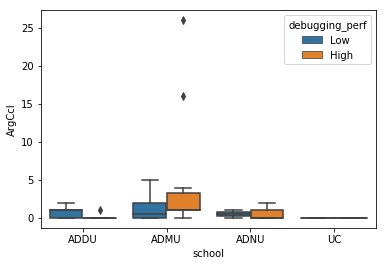

In [63]:
sns.boxplot(x="school", y="ArgCcl", hue="debugging_perf", data=df_static)